In [3]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
  data = []
  with open(filename, 'r') as file:
    # Read the first line separately if it's metadata
    first_line = file.readline().strip()
    metadata = list(map(int, first_line.split()))

    # Now, read the rest of the lines as data
    for line in file:
      # Split each line by spaces and convert to integers
      row = [float(value) for value in line.split(',')]
      data.append(row)
    X, y = [], []
    for i in data:
        X.append(i[:metadata[0]])
        y.append(i[metadata[0]:])
  return X, y

def load_data2(filename):
  data = []
  with open(filename, 'r') as file:
    # Read the first line separately if it's metadata
    first_line = file.readline().strip()
    metadata = list(map(int, first_line.split()))

    # Now, read the rest of the lines as data
    for line in file:
      # Split each line by spaces and convert to integers
      row = [float(value) for value in line.split(',')]
      data.append(row)
    X = data[:3]
    y = data[3:]
  return X, y

In [4]:
data = load_data2('constraints_008.txt')
A, b = data
print(A)
print(b)

FileNotFoundError: [Errno 2] No such file or directory: 'constraints_008.txt'

In the `multilinear_regression` function, a column of ones is added to $( X )$ to include an intercept term in the model. This modifies the regression equation from:

$$
y = X \beta + \epsilon
$$

to:

$$
y = \beta_0 + X \beta + \epsilon,
$$

where $( \beta_0 )$ is the intercept.

By adding a column of ones, the augmented $( X )$ matrix becomes:

$$
X = \begin{bmatrix} 1 & x_1 & x_2 & \dots & x_{10} \end{bmatrix},
$$

allowing the model to solve for both $( \beta_0 )$ and $( \beta )$ in the unified equation:

$$
\beta = (X^\top X)^{-1} X^\top y.
$$


In [8]:
def calculate_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2) #mse
    mae = np.mean(np.abs(y_true - y_pred)) #mae

    #Pearson Correlation
    correlations = []
    for i in range(y_true.shape[1]):
        correlations.append(np.corrcoef(y_true[:, i], y_pred[:, i])[0, 1])
    return mse, mae, np.array(correlations)

def multilinear_regression(X, y):
    X = np.c_[np.ones(X.shape[0]), X]
    print(X.shape)
    print(y.shape)
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta
def predict(X, coefficients):
    X = np.c_[np.ones(X.shape[0]), X]
    y_pred = np.dot(X, coefficients)
    return y_pred

In [9]:
# Load data
X, y = load_data('regression_data_008.txt')
X = np.array(X)
y = np.array(y)

# Splitting data into training and testing sets
split_ratio = 0.8  # Example: 80% training, 20% testing
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Finding beta*
coefficients = multilinear_regression(X_train, y_train)
y_pred_test = predict(X_test, coefficients)
print("Beta*:\n", coefficients)

(8000, 11)
(8000, 3)
Beta*:
 [[ 8.10142712  7.01050763 -9.35653383]
 [ 8.20567145  8.95093416 -0.54734163]
 [-6.21991002 -7.13402535  0.3967935 ]
 [-0.71256397  9.67387179 -3.83685512]
 [ 8.98275196 -7.79185245 -5.33702323]
 [ 6.36989555 -1.4607191   4.55270336]
 [ 3.80605766  8.67674704 -6.89801894]
 [ 7.02607221 -9.22430258 -9.11771786]
 [ 6.19435924 -7.23599711 -9.58710768]
 [-1.01846874  1.66316292 -4.9961142 ]
 [ 7.70965011  0.24989361 -8.60815477]]


In [7]:
Q = X
print(Q.shape)

(10000, 10)



# 1. Multilinear Regression

$$
X \beta = y
$$

$$
\beta^* =
\begin{bmatrix}
  8.10142712 &  7.01050763 & -9.35653383 \\
  8.20567145 &  8.95093416 & -0.54734163 \\
 -6.21991002 & -7.13402535 &  0.3967935  \\
 -0.71256397 &  9.67387179 & -3.83685512 \\
  8.98275196 & -7.79185245 & -5.33702323 \\
  6.36989555 & -1.4607191  &  4.55270336 \\
  3.80605766 &  8.67674704 & -6.89801894 \\
  7.02607221 & -9.22430258 & -9.11771786 \\
  6.19435924 & -7.23599711 & -9.58710768 \\
 -1.01846874 &  1.66316292 & -4.9961142  \\
  7.70965011 &  0.24989361 & -8.60815477
\end{bmatrix}
$$


1.1.3 Metrics - Pearson Correlation, Mean Squared Error, Mean Absolute Error (p-value is not required).
You need to generate a correlation plot for each regression Q1.

Mean Squared Error: 0.04107002002275057
Mean Absolute Error: 0.16243648199933067
Pearson Correlations: [0.9999454  0.99996149 0.99994332]


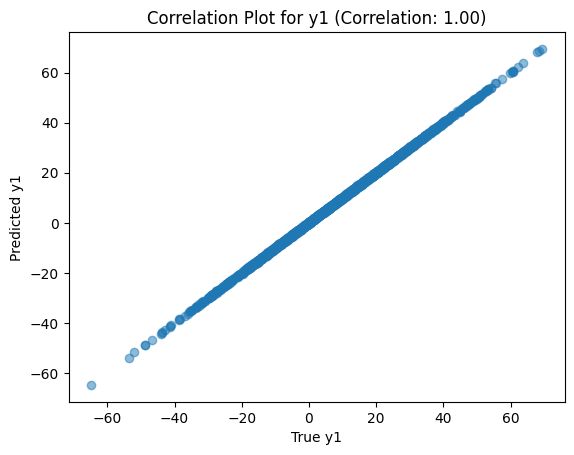

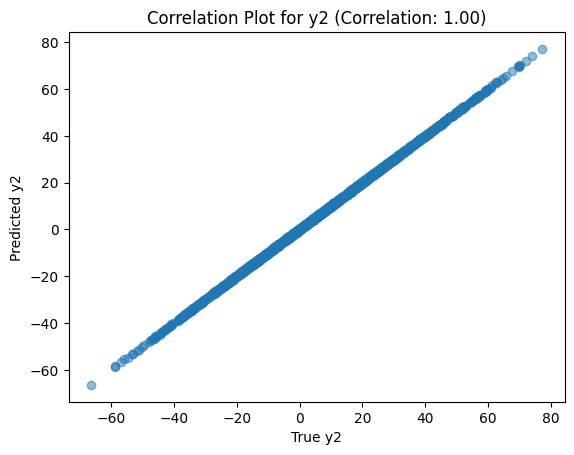

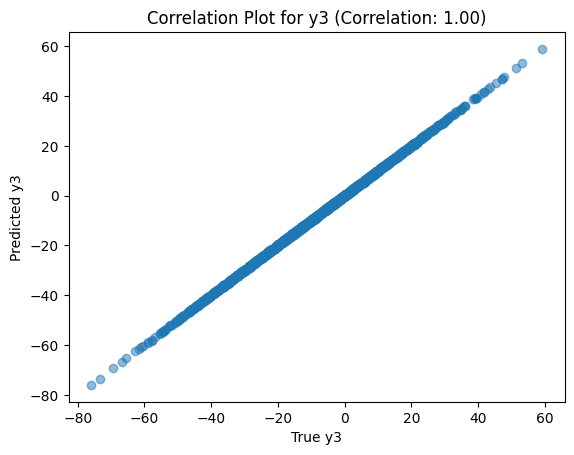

In [9]:

# Calculating metrics
mse, mae, correlations = calculate_metrics(y_test, y_pred_test)

# Printing metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Pearson Correlations: {correlations}")

# Creating correlation plots
for i in range(y_test.shape[1]):
  plt.figure()
  plt.scatter(y_test[:, i], y_pred_test[:,i], alpha=0.5)
  plt.xlabel(f"True y{i+1}")
  plt.ylabel(f"Predicted y{i+1}")
  plt.title(f"Correlation Plot for y{i+1} (Correlation: {correlations[i]:.2f})")
  plt.show()

In [10]:

def polynomial_kernel(X, Y, degree):
    return (1 + np.dot(X, Y.T)) ** degree

def train_polynomial_regression(X, y, degree, lambda_reg=1e-5):
    # Computing the kernel matrix
    K = polynomial_kernel(X, X, degree)

    # Solving for the dual coefficients
    n_samples = K.shape[0]
    alphas = np.linalg.inv(K + lambda_reg * np.eye(n_samples)) @ y
    return alphas

def predict_polynomial_regression(X_test, X_train, alphas, degree):
    K_test = polynomial_kernel(X_test, X_train, degree)
    y_pred = np.dot(K_test, alphas)
    return y_pred

# Loading data
X, y = load_data('poly_regression_data_008.txt')
X = np.array(X)
y = np.array(y)

# Splitting data into training and testing sets
split_ratio = 0.8  # Example: 80% training, 20% testing
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


Mean Squared Error: 0.6126431938531962
Mean Absolute Error: 0.5889140681392878
Pearson Correlations: [0.81213063 0.82048756 0.31027791]


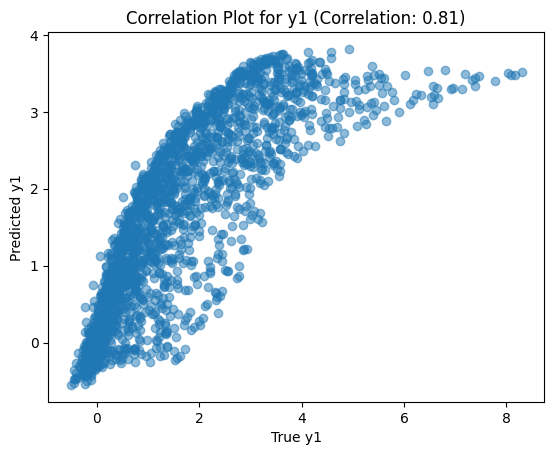

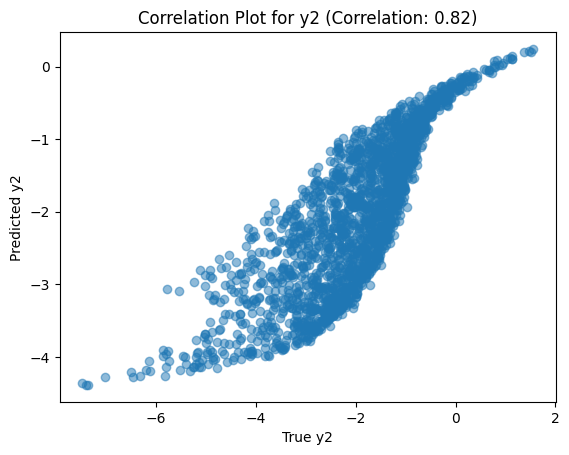

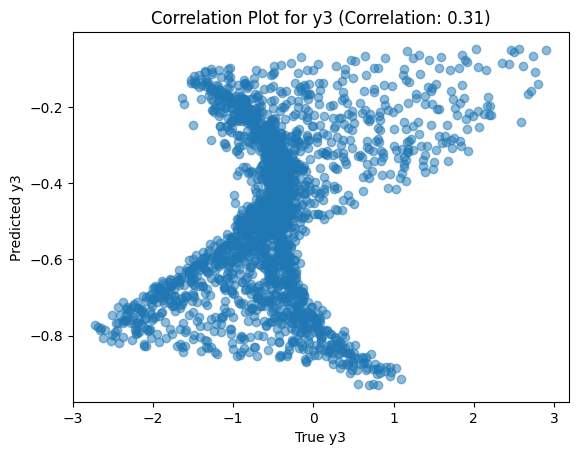

Mean Squared Error: 0.14383112408434082
Mean Absolute Error: 0.29121835356228104
Pearson Correlations: [0.97384852 0.94619181 0.87226741]


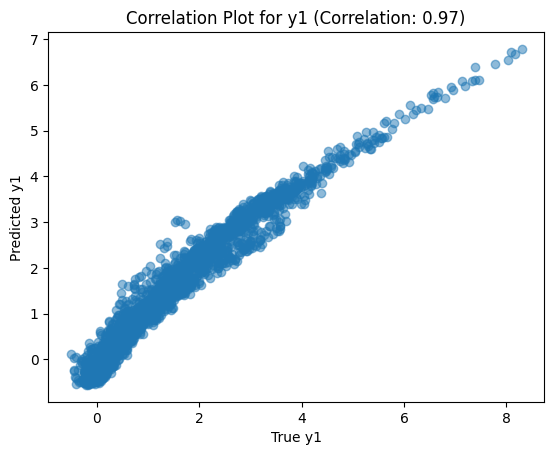

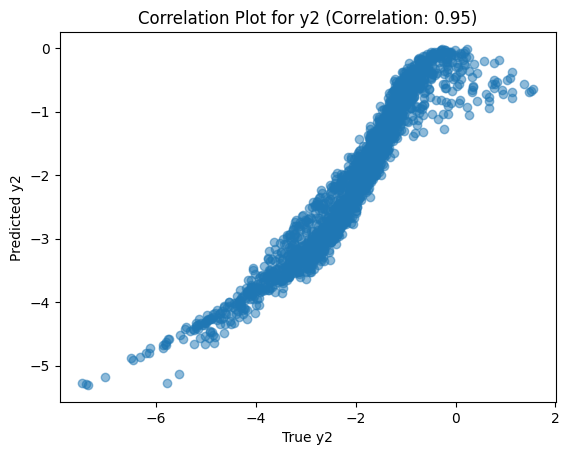

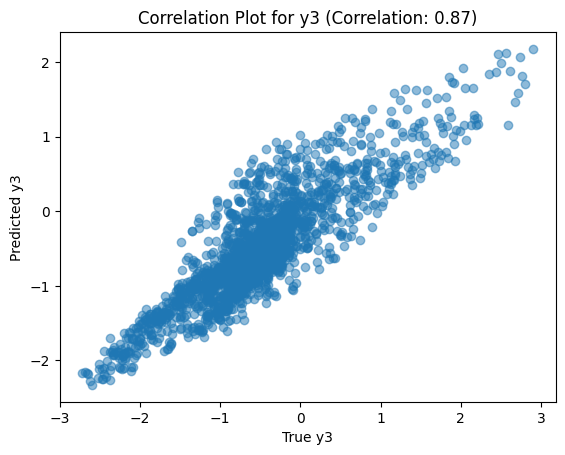

Mean Squared Error: 0.00977054777716057
Mean Absolute Error: 0.07882555270890754
Pearson Correlations: [0.99757304 0.99676224 0.99320828]


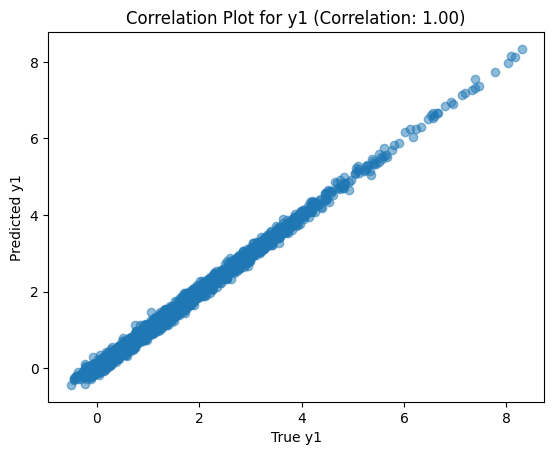

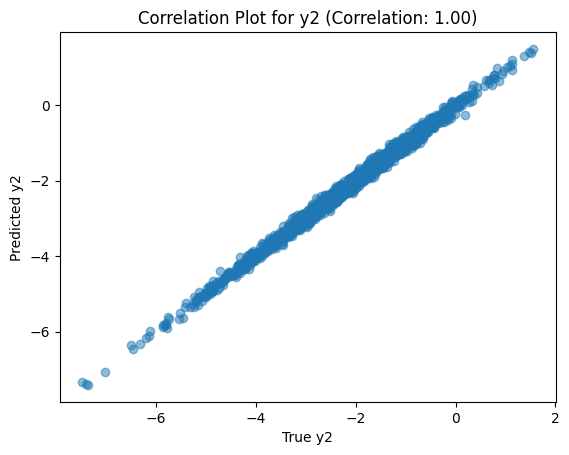

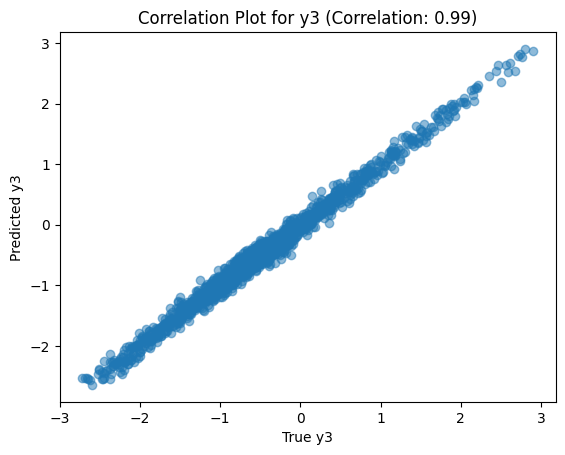

Mean Squared Error: 0.009777699182682006
Mean Absolute Error: 0.07887245026012306
Pearson Correlations: [0.99757106 0.99676223 0.9931991 ]


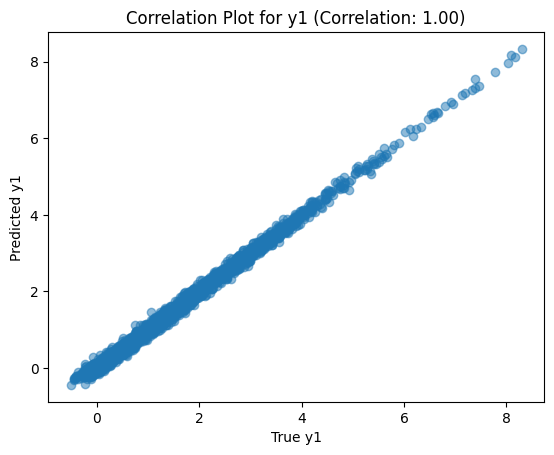

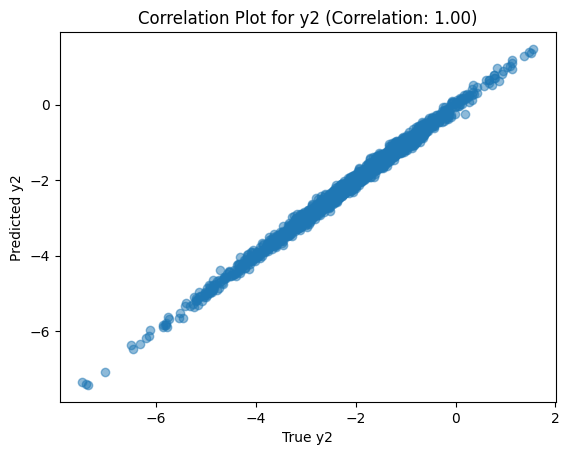

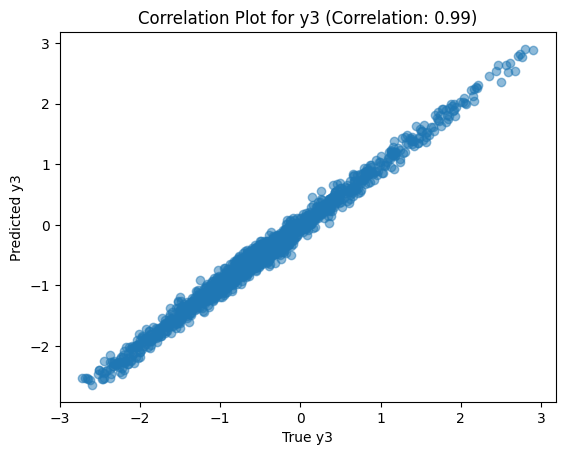

In [11]:

# Running for different degrees
for degree in range(1, 5):
    # Polynomial Regression
    alphas = train_polynomial_regression(X_train, y_train, degree)
    y_pred = predict_polynomial_regression(X_test, X_train, alphas, degree)

    # Calculate metrics
    mse, mae, correlations = calculate_metrics(y_test, y_pred)


    # Print metrics
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Pearson Correlations: {correlations}")

    # Create correlation plots
    for i in range(y_test.shape[1]):
      plt.figure()
      plt.scatter(y_test[:, i], y_pred[:,i], alpha=0.5)
      plt.xlabel(f"True y{i+1}")
      plt.ylabel(f"Predicted y{i+1}")
      plt.title(f"Correlation Plot for y{i+1} (Correlation: {correlations[i]:.2f})")
      plt.show()

In [13]:
data = load_data2('constraints_008.txt')
X, y = data

In [15]:
print(data)

([[3.5846, 6.074781, -2.381177, -8.681273, -4.237088, 8.191871, -5.732293, -0.957521, 8.62412, -9.502015], [2.010978, 9.00259, -5.393942, 0.969798, 8.182567, -7.336611, 0.468252, 5.008197, 3.380265, -0.644943], [54.917766]], array([[ 3.37117 , -2.376539, -2.174539],
       [ 1.440975, -1.16411 , -0.858918],
       [ 1.955082, -1.989601, -1.006654],
       ...,
       [ 1.020276, -1.379766, -1.105993],
       [ 0.120727, -3.35916 , -0.698678],
       [ 3.426601, -0.487252,  0.427411]]))
